1.0 0.0 [0.         0.49803922 1.        ]
1.0 0.0 [0.         0.49803922 1.        ]
1.0 -1.0
[#] Mask: 


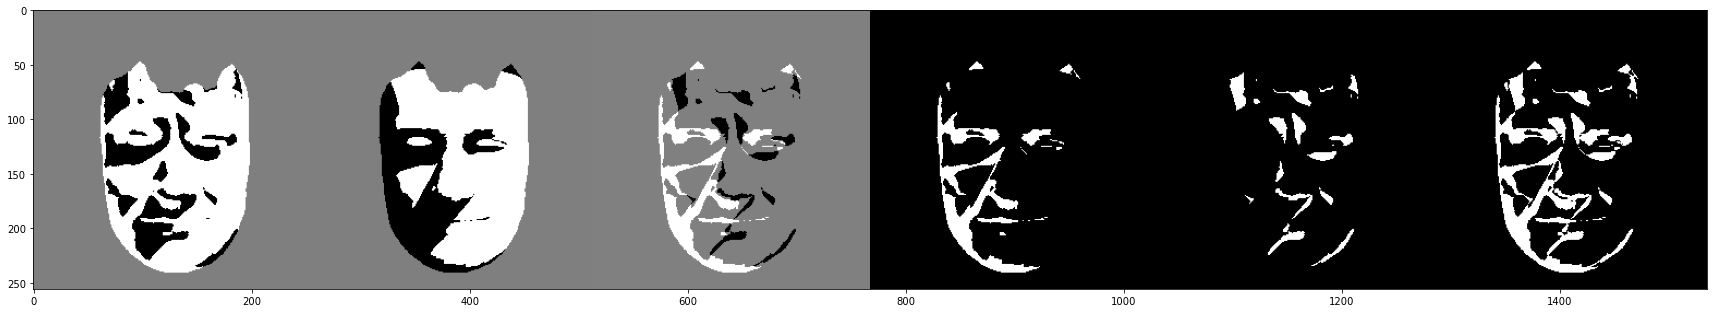

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import imutils

def create_image_grid(images, n_rows=1):
    """
    Creates a grid of images from a list of NumPy arrays.
    
    Parameters:
    - images: List of np.array, each representing an image.
    - n_rows: Number of rows in the grid.
    
    Returns:
    - A matplotlib figure containing the image grid.
    """
    n_images = len(images)
    n_cols = (n_images + n_rows - 1) // n_rows  # Calculate number of columns needed
    
    # Get the height and width of the images (assuming all images are the same size)
    # img_height, img_width = images[0].shape[:2]

    # Add zero images if the number of images is less than needed to fill the grid
    images += [np.zeros_like(images[0]) for _ in range(n_rows * n_cols - n_images)]
    
    # Create the grid by concatenating images
    rows = []
    for i in range(n_rows):
        row_images = images[i * n_cols:(i + 1) * n_cols]
        rows.append(np.concatenate(row_images, axis=1))
    
    grid_image = np.concatenate(rows, axis=0)
    return grid_image

m1 = np.array(Image.open("/data/mint/DPM_Dataset/ffhq_256_with_anno/shadow_diff//median5_5e-2/valid/60065.png")) / 255.
m2 = np.array(Image.open("/data/mint/DPM_Dataset/ffhq_256_with_anno/shadow_masks_t5e-1_forvis/valid/60065.png")) / 255.
print(np.max(m1), np.min(m1), np.unique(m1))
print(np.max(m2), np.min(m2), np.unique(m2))
print(np.max(m1 - m2), np.min(m1 - m2))
tmp = [
    m1, 
    m2, 
    ((m1 - m2) + 1) * 0.5,
    (((m1 - m2) + 1) * 0.5) == 1.0,
    (((m1 - m2) + 1) * 0.5) == 0.0,
    ((((m1 - m2) + 1) * 0.5) == 1.0) + ((((m1 - m2) + 1) * 0.5) == 0.0)
]

print("[#] Mask: ")
plt.figure(figsize=(30, 30))
plt.imshow(create_image_grid(tmp, 1), cmap='gray')
plt.show()

[-1.  0.  1.]
[0.  0.5 1. ]
[False  True]
Centroid at: (121, 205), Pixel value: [0 0 0]
Contour has zero area, cannot determine centroid. Setting one point in the contour as centroid.
Contour has zero area, cannot determine centroid. Setting one point in the contour as centroid.
Centroid at: (157, 191), Pixel value: [0 0 0]
Contour has zero area, cannot determine centroid. Setting one point in the contour as centroid.
Centroid at: (116, 192), Pixel value: [0 0 0]
Contour has zero area, cannot determine centroid. Setting one point in the contour as centroid.
Centroid at: (172, 126), Pixel value: [0 0 0]
Contour has zero area, cannot determine centroid. Setting one point in the contour as centroid.
Contour has zero area, cannot determine centroid. Setting one point in the contour as centroid.
Centroid at: (174, 121), Pixel value: [255 255 255]
Contour has zero area, cannot determine centroid. Setting one point in the contour as centroid.
Centroid at: (150, 115), Pixel value: [0 0 0]
Cent

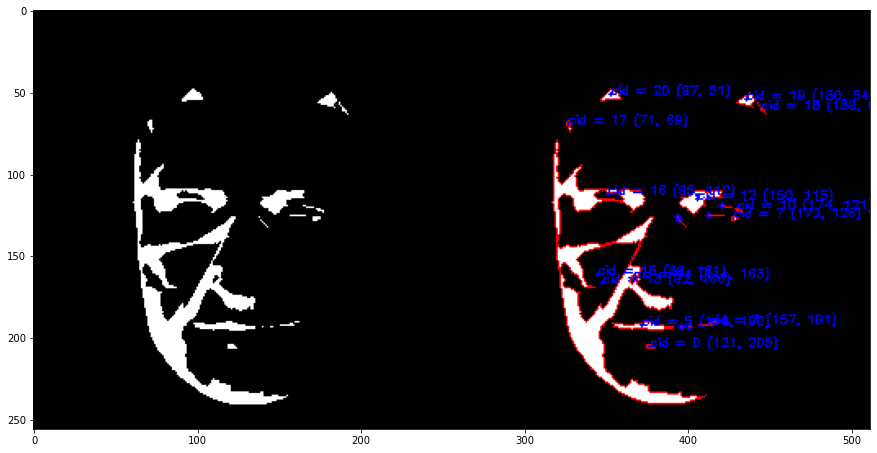

Number of centroids: 21
Centroid at: (127, 210), Pixel value: [0 0 0]
Centroid at: (173, 217), Pixel value: [0 0 0]
Centroid at: (125, 200), Pixel value: [0 0 0]
Centroid at: (92, 173), Pixel value: [0 0 0]
Centroid at: (162, 172), Pixel value: [0 0 0]
Centroid at: (135, 173), Pixel value: [0 0 0]
Centroid at: (147, 171), Pixel value: [0 0 0]
Centroid at: (156, 163), Pixel value: [0 0 0]
Centroid at: (119, 149), Pixel value: [0 0 0]
Centroid at: (159, 133), Pixel value: [0 0 0]
Contour has zero area, cannot determine centroid. Setting one point in the contour as centroid.
Centroid at: (178, 118), Pixel value: [0 0 0]
Centroid at: (119, 106), Pixel value: [0 0 0]
Centroid at: (136, 107), Pixel value: [0 0 0]
Centroid at: (98, 83), Pixel value: [0 0 0]
Contour has zero area, cannot determine centroid. Setting one point in the contour as centroid.
Contour has zero area, cannot determine centroid. Setting one point in the contour as centroid.
Centroid at: (139, 80), Pixel value: [0 0 0]
Ce

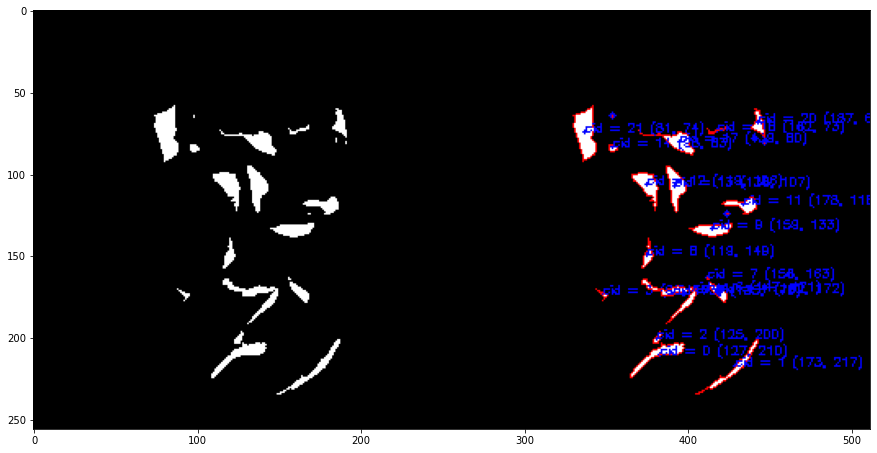

Number of centroids: 22


In [9]:
import cv2

def contour_and_centroiod(image):
    draw_image = np.repeat(image.copy(), 3, axis=-1)


    # contours, _ = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    contours, _ = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Ensure at least one contour was found
    if contours:
        # Calculate moments for each contour
        count_centroids = 0
        for contour in contours:
            M = cv2.moments(contour)
            randc = (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255))
            if M['m00'] != 0:
                # Calculate x, y coordinate of center
                cX = int(M['m10'] / M['m00'])
                cY = int(M['m01'] / M['m00'])
                print(f"Centroid at: ({cX}, {cY}), Pixel value: {draw_image[cX, cY]}")
                # if np.allclose(draw_image[cX, cY], 0):
                #     print(f"The centroid is at the background. Skipping...")
                #     continue
                # Draw the centroid on the image
                # cv2.circle(image, (cX, cY), 5, (0, 0, 255), -1)
                cv2.circle(draw_image, (cX, cY), 1, (0, 0, 255), -1)
                # Optionally, draw the contours for visualization
                # cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
                cv2.drawContours(draw_image, [contour], -1, (255, 0, 0), 1)
                cv2.putText(draw_image, f"cid = {count_centroids} ({cX}, {cY})", (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.25, (0, 0, 255), 1)
                count_centroids += 1
                # cv2.drawContours(draw_image, [contour], -1, randc, cv2.FILLED)
                # print(f"Centroid at: ({cX}, {cY})")
            else:
                print("[#] Contour has zero area, cannot determine centroid. Setting one point in the contour as centroid.")
                cX, cY = contour[0][0]
                cv2.circle(draw_image, (cX, cY), 2, (0, 0, 255), -1)
                cv2.drawContours(draw_image, [contour], -1, (255, 0, 0), 1)
                count_centroids += 1

    # Display the image with the centroid marked
    fig = plt.figure(figsize=(15, 15))
    plt.imshow(create_image_grid([np.repeat(image, 3, -1), draw_image], 1))
    plt.show()
    print(f"Number of centroids: {count_centroids}")
    
# The part of image where we want to add during floodfill morphological operation
print(np.unique(m1 - m2))
print(np.unique((m1 - m2 + 1) * 0.5))
to_add = np.isclose(((m1 - m2) + 1) * 0.5, 1.0)
print(np.unique(to_add))
# assert False

to_add = (to_add[..., None] * 255).astype(np.uint8)
contour_and_centroiod(to_add)

to_rmv = (((m1 - m2) + 1) * 0.5) == 0.0
to_rmv = (to_rmv[..., None] * 255.0).astype(np.uint8)
contour_and_centroiod(to_rmv)